<a href="https://colab.research.google.com/github/mjg1000/mjg1000.github.io/blob/main/personal/AI/Deep_reinforcement_travelling_salesman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install gym

^C


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf


In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [ ]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3070, pci bus id: 0000:07:00.0, compute capability: 8.6



In [ ]:

import gym, random
import matplotlib.pyplot as plt
import math

In [ ]:
def createpoints(): #creates 100 random points
  point_space = []
  for i in range(100):
    point_space.append([random.randint(0,100),random.randint(0,100)])
  print(point_space)
  x = [i[0] for i in point_space]
  y = [i[1] for i in point_space]
  plt.scatter(x,y)
  return(point_space)

##randomscore

[[89, 67], [60, 5], [96, 30], [47, 5], [51, 12], [2, 91], [33, 61], [72, 84], [24, 72], [12, 23], [73, 79], [0, 74], [34, 6], [80, 90], [66, 93], [68, 61], [83, 91], [55, 85], [35, 98], [30, 90], [20, 88], [68, 92], [67, 13], [20, 60], [31, 95], [28, 52], [58, 20], [57, 63], [41, 60], [4, 48], [37, 7], [53, 82], [60, 76], [58, 99], [94, 52], [68, 66], [55, 8], [81, 69], [73, 89], [94, 99], [37, 7], [94, 92], [48, 57], [59, 2], [75, 89], [55, 26], [31, 3], [9, 15], [82, 44], [40, 41], [2, 15], [48, 34], [48, 12], [49, 18], [40, 43], [77, 20], [61, 89], [46, 100], [69, 62], [98, 92], [56, 32], [25, 36], [67, 97], [4, 27], [64, 49], [89, 87], [78, 12], [48, 64], [45, 65], [36, 75], [63, 78], [92, 60], [8, 63], [37, 19], [36, 39], [61, 62], [46, 28], [84, 24], [13, 52], [15, 2], [70, 1], [74, 37], [93, 48], [14, 80], [12, 96], [45, 94], [75, 59], [14, 87], [31, 72], [75, 82], [85, 39], [24, 53], [2, 99], [65, 64], [23, 99], [27, 99], [17, 65], [14, 67], [12, 22], [61, 44]]
[[[89, 67], [60,

KeyboardInterrupt: ignored

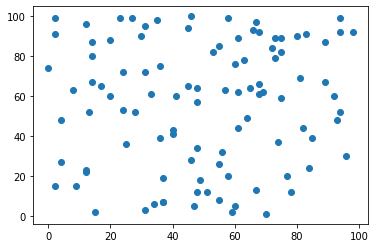

In [ ]:
# getting avrg for a random guess
import copy
xs = []
ys = []
ps = []
ps2 = createpoints()
for i in range(100):
  ps.append(copy.deepcopy(ps2))
print(ps)

for i in range(100):
  point_space = ps[i] #how long for the agent to get all desired locs guessing at random?
  def scoreforrandom(point_space):
    score = 0 
    position = [0,0]
    while len(point_space) != 0:
      score -= 1
      if random.randint(0,1) == 1:
        if random.randint(0,1) == 1:
          position[0] += 1
        else:
          position[0] -= 1
      else:
        if random.randint(0,1) == 1:
          position[1] += 1
        else:
          position[1] -= 1
      if position[0] > 100:
        position[0] = 100
      elif position[0] < 0:
        position[0] = 0
      elif position[1] > 100:
        position[1] = 100
      elif position[1] < 0:
        position[1] =0
        
      for i in range(len(point_space)):
        if point_space[i] == position:
          del point_space[i]
          break
    return(score)
  xs.append(i)
  ys.append(scoreforrandom(point_space))
xs.sort()
plt.cla()
plt.plot(xs,ys)

In [ ]:
total = 0 
for i in ys:
  total += i
total /= 100
print(total)
#avrg is -223000, average is the same for any enviroment

NameError: ignored

##Reinforcement model


In [ ]:
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random
import copy

In [ ]:
class GraphEnv(Env):
  def __init__(self):
      self.point_space = createpoints() #enviroment
      self.action_space = Discrete(4) # all possible actions - this is the output from the nn
      self.observation_shape = (202,1) #this is shape of what is fed into the neural network,
      self.observation_space = self.point_space.copy() # this is what is fed into the network
      self.state = [0,0] #placeholder for observations whilst in step function
     
      for i in self.observation_space: #setting up self.state to include location and all other locations
        self.state.append(i[0])
        self.state.append(i[1])
      self.observation_space = self.state #observation space is the state
      self.observation_space = np.array(self.observation_space) #turn observation space into np array (nn can only take in np arr as input)
      self.length = len(self.point_space) #old code - used to decide when enviroment is over
      self.totallen = 0 #stores the total length travelled
      self.unchangedpoint_space = self.point_space.copy() # a permanent copy of point space as point space changes
  def step(self, action):
    #storage
    oldstate = [self.state[0],self.state[1]] #gets old location
    self.state = [] # empty self.state for new state 

    #movement
    if(action + 1) == 1 or (action + 1) == 2:
      temp = oldstate
      if (action+1) == 1:  #right
        temp[0] += 1 #changes x val of temp
        self.state.append(temp[0]) #adds in the position to self.state 
        self.state.append(temp[1])
      else:              #left
        temp[0] -= 1
        self.state.append(temp[0])
        self.state.append(temp[1])
    else:
      temp = oldstate
      if (action+1) == 3: #up
        temp[1] += 1 #changes y value of temp
        self.state.append(temp[0])
        self.state.append(temp[1])
      else:           #down
        temp[1] -= 1
        self.state.append(temp[0])
        self.state.append(temp[1])

    #dont go past the boundary, also if it tries to then the length is not increased (env = 100x100) 
    if self.state[0] > 100:
      self.state[0] = 100
      self.totallen += 1 
    elif self.state[0] < 0:
      self.state[0] = 0
      self.totallen += 1 
    elif self.state[1] > 100:
      self.state[1] = 100
      self.totallen += 1 
    elif self.state[1] < 0:
      self.state[1] = 0
      self.totallen += 1 
    
    
    corr = 0 
    for i in range(len(self.point_space)): #checks if on a desired locaiton
        lis = []
        lis.append(self.state[0])
        lis.append(self.state[1])
        if self.point_space[i + corr] == lis: #on location, remove it from location list
          del self.point_space[i + corr] 
          corr -= 1 #correction value because list iterating on is deleted 
          if len(self.point_space) == 0: #stops if there are no more desired locations
            break
        else:
          self.state.append(self.point_space[i+corr][0]) #fills self.state with desired locations
          self.state.append(self.point_space[i+corr][1])
    #self.action_space = Discrete(len(self.point_space))
    #print("self.state = ", self.state)

    #reward = - length
    reward = self.totallen -1 
    self.totallen = reward

    self.length -= 1
    
    #finish when all spaces visited 
    if len(self.point_space) <= 0:
      #print("unchanged =", self.unchangedpoint_space)
      randomscore = 0
      ps = copy.deepcopy(self.unchangedpoint_space)
      ps2 = copy.deepcopy(ps)
      randomscore += scoreforrandom(ps2)
      reward2 = self.totallen - randomscore
      reward += -reward + reward2
      #print("totallen =",self.totallen)
      #print("randomscore =", randomscore)
      #print("reward", reward)
      done = True
      #print("DONE")
    else:
      done = False

    #return observation - padded 9999s
    info = {}
    #print(self.state)
    an_array = np.array(self.state)
    #print(an_array)
    shape = np.shape(an_array)
    #print(shape)
    padded_array = np.zeros((202,))
    padded_array.fill(9999)
    padded_array[:shape[0]] = an_array
    observation = padded_array
    #print(np.shape(observation))

    #print(observation)
    return(observation,reward,done,info) #returns the observations for next timestep, reward at this time, if done, and info
  def render(self):
    
    pass
  def reset(self): #reset after episode
    self.length = 100 #old code
    self.point_space = createpoints() #newpoints 
    notobsspace = self.point_space.copy() #storage var
    self.state = [0,0] #starts at 0,0
     
    for i in notobsspace: #adding self.state with the enviroment
      self.state.append(i[0])
      self.state.append(i[1]) 
    notobsspace = self.state
    print("state", self.state)
    self.unchangedpoint_space = self.point_space.copy()
    #print("unchanged on init", self.unchangedpoint_space)
    self.action_space = Discrete(4) #sets up action space
    self.totallen = 0 #resets len (and hence reward)
    return(self.state) #returns starting observation
    pass

GraphEnv2 (output is a 2d arr)

In [ ]:
class GraphEnv2(Env):
  import time
  def __init__(self):
      self.point_space = createpoints() #enviroment
      self.action_space = Discrete(4) # all possible actions - this is the output from the nn
      self.observation_shape = (101,2) #this is shape of what is fed into the neural network,
      self.observation_space = self.point_space.copy() # this is what is fed into the network
      self.state = [[0,0]] #placeholder for observations whilst in step function
     
      for i in self.observation_space: #setting up self.state to include location and all other locations
        self.state.append(i)
      self.observation_space = self.state #observation space is the state
      self.observation_space = np.array(self.observation_space) #turn observation space into np array (nn can only take in np arr as input)
      self.length = len(self.point_space) #old code - used to decide when enviroment is over
      self.totallen = 0 #stores the total length travelled
      self.unchangedpoint_space = self.point_space.copy() # a permanent copy of point space as point space changes
      self.randomscore = 223000 #if guessing randomly, score avrgs 223000, so reward per point should be 223000/100
  def step(self, action):
    #storage
    #print(self.randomscore)
    reward = 0 #init reward
    oldstate = self.state[0] #gets old location
    del self.state[0] # empty self.state for new location 
    #print(oldstate)

    #movement
    if(action + 1) == 1 or (action + 1) == 2:
      temp = oldstate
      #print(temp)
      if (action+1) == 1:  #right
        temp[0] += 1 #changes x val of temp
        #self.state.insert(0,list(temp)) #adds in the position to self.state 
      else:              #left
        temp[0] -= 1
        #self.state.insert(0,list(temp))
    else:
      temp = oldstate
      if (action+1) == 3: #up
        temp[1] += 1 #changes y value of temp
        #self.state.insert(0,list(temp))
      else:           #down
        temp[1] -= 1
        #self.state.insert(0,list(temp))

    #dont go past the boundary, also if it tries to then the length is not increased (env = 100x100) 
    if temp[0] > 100:
      temp[0]  = 100
      self.totallen += 1 
    elif temp[0]  < 0:
      temp[0]  = 0
      self.totallen += 1 
    elif temp[1] > 100:
      temp[1] = 100
      self.totallen += 1 
    elif temp[1] < 0:
      temp[1] = 0
      self.totallen += 1 
    temp = list(temp)
    
    
    corr = 0 
    lis = []
    lis.append(temp)
    for i in range(len(self.point_space)): #checks if on a desired locaiton
        #print(lis)
        if self.point_space[i + corr] == lis[0]: #on location, remove it from location list
          #print(self.point_space[i+corr],lis[0],self.state[0])
          #print(self.length)
          
          index = self.state.index(self.point_space[i+corr])
          del self.state[index] 
          del self.point_space[i + corr]
          if len(self.point_space) <= 10:
            print(len(self.point_space))
          reward += self.randomscore/100
          #print(reward)
          corr -= 1 #correction value because list iterating on is deleted 
          if len(self.point_space) == 0: #stops if there are no more desired locations
            break
    self.state.insert(0,lis[0])

    #reward = - length
    reward -= 1
    self.totallen -= 1

    self.length -= 1
    
    #finish when all spaces visited 
    if len(self.point_space) <= 0:
      done = True
      print("Finished")
    else:
      done = False
    #return observation - padded 9999s
    info = {}
    #print(self.state)
    an_array = np.array(self.state)
    #print(an_array)
    
    shape = np.shape(an_array)
    padded_array = np.zeros((101,2))
    padded_array.fill(9999)
    padded_array[:shape[0],:shape[1]] = an_array
    observation = padded_array
    return(observation,reward,done,info) #returns the observations for next timestep, reward at this time, if done, and info
  def render(self):
    
    pass
  def reset(self): #reset after episode
    self.length = 100 #old code
    self.point_space = createpoints() #newpoints 
    notobsspace = self.point_space.copy() #storage var
    self.state = [[0,0]] #starts at 0,0
     
    for i in notobsspace: #adding self.state with the enviroment
      self.state.append(i)
    notobsspace = self.state
    print("state", self.state)
    self.unchangedpoint_space = self.point_space.copy()
    #print("unchanged on init", self.unchangedpoint_space)
    self.action_space = Discrete(4) #sets up action space
    self.totallen = 0 #resets len (and hence reward)
    self.randomscore = 223000
    return(self.state) #returns starting observation
    pass

In [ ]:
ps = [[79, 47], [80, 23], [77, 79], [86, 88], [11, 92], [65, 86], [40, 96], [70, 6], [41, 33], [6, 33], [40, 60], [29, 18], [20, 79], [29, 35], [87, 13], [60, 83], [39, 68], [66, 7], [30, 52], [87, 3], [20, 80], [100, 66], [98, 18], [48, 99], [17, 80], [70, 8], [41, 36], [33, 100], [96, 57], [25, 50], [53, 59], [30, 13], [51, 89], [27, 53], [46, 35], [30, 51], [63, 8], [10, 9], [99, 60], [90, 20], [72, 53], [63, 100], [97, 11], [79, 29], [78, 10], [33, 7], [65, 43], [11, 79], [99, 54], [41, 36], [12, 96], [88, 90], [59, 54], [79, 49], [41, 80], [29, 38], [57, 37], [72, 84], [32, 19], [62, 48], [80, 46], [13, 29], [9, 77], [63, 95], [53, 13], [84, 84], [93, 94], [63, 66], [89, 19], [49, 73], [80, 93], [92, 59], [12, 87], [64, 14], [10, 19], [96, 7], [67, 25], [36, 37], [96, 64], [76, 68], [82, 12], [14, 29], [4, 100], [89, 5], [2, 78], [26, 54], [87, 93], [29, 11], [96, 17], [66, 85], [84, 6], [58, 5], [22, 35], [69, 34], [26, 33], [41, 77], [58, 15], [74, 45], [50, 85], [23, 52]]
print(scoreforrandom(ps)) #testing stuff

NameError: ignored

[[72, 71], [26, 41], [81, 83], [12, 68], [97, 47], [6, 94], [41, 36], [5, 78], [15, 47], [27, 52], [49, 75], [92, 71], [53, 73], [14, 59], [34, 48], [89, 93], [59, 28], [20, 37], [7, 12], [86, 45], [46, 33], [56, 70], [96, 87], [89, 80], [81, 14], [98, 55], [60, 43], [58, 76], [5, 89], [100, 51], [49, 12], [82, 15], [52, 11], [46, 29], [18, 86], [97, 62], [69, 82], [67, 74], [62, 69], [82, 24], [32, 60], [55, 70], [82, 71], [49, 20], [35, 27], [5, 9], [22, 5], [90, 24], [94, 57], [45, 7], [47, 12], [41, 84], [49, 92], [19, 43], [52, 44], [33, 0], [81, 15], [92, 5], [76, 84], [78, 10], [90, 67], [14, 62], [30, 0], [86, 28], [79, 10], [30, 56], [51, 81], [6, 65], [15, 84], [96, 60], [77, 62], [23, 6], [67, 67], [89, 15], [71, 99], [56, 32], [16, 24], [4, 69], [75, 93], [4, 66], [74, 39], [16, 4], [59, 70], [16, 41], [32, 38], [62, 24], [4, 49], [97, 71], [67, 93], [90, 100], [15, 34], [80, 97], [79, 78], [11, 22], [50, 32], [97, 42], [63, 89], [100, 33], [61, 64], [98, 65]]


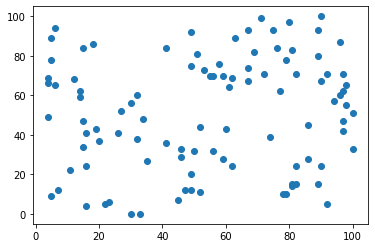

In [ ]:
env = GraphEnv2() #creates env as class GraphEnv

In [ ]:
env.action_space.sample() #random item from action space


2

In [ ]:
!pip install time 

ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time


[[27, 67], [35, 34], [29, 75], [61, 59], [40, 91], [28, 32], [100, 55], [60, 14], [63, 85], [51, 48], [21, 73], [87, 45], [77, 49], [52, 99], [49, 19], [77, 5], [57, 86], [95, 98], [42, 44], [34, 50], [72, 59], [43, 39], [6, 24], [82, 66], [40, 74], [86, 8], [33, 2], [38, 17], [99, 69], [60, 98], [50, 45], [26, 55], [91, 82], [32, 67], [4, 36], [87, 87], [56, 67], [59, 16], [61, 47], [70, 92], [31, 49], [96, 68], [43, 66], [61, 56], [74, 68], [46, 86], [94, 18], [17, 29], [55, 13], [100, 96], [25, 49], [79, 23], [96, 37], [59, 21], [19, 0], [58, 14], [91, 37], [70, 22], [0, 91], [64, 21], [45, 44], [58, 85], [4, 68], [48, 94], [85, 58], [55, 94], [75, 7], [3, 55], [88, 18], [19, 11], [21, 41], [50, 43], [72, 76], [37, 21], [46, 36], [45, 20], [67, 86], [29, 75], [53, 56], [55, 2], [16, 43], [33, 8], [60, 80], [54, 7], [76, 45], [89, 100], [7, 36], [78, 79], [43, 7], [18, 96], [50, 93], [47, 10], [100, 11], [85, 90], [25, 19], [96, 36], [81, 27], [58, 65], [67, 19], [20, 44]]
state [[0,

KeyboardInterrupt: ignored

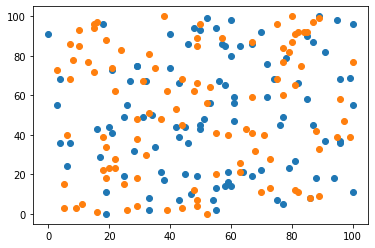

In [ ]:
import time
episodes = 3 #testing, loops 3 times
for episode in range(1,episodes+1):
  state = env.reset()
  done = False #episode stops when done 
  score = 0 
  start = time.time()
  while not done:
    action = env.action_space.sample() #does random action from all possible 
    n_state, reward, done, info = env.step(action) #gets the output from a single step
    #print(env.length)
    score += reward
  end = time.time()
  print("time = ",end-start)
  print('Episode:{} Score:{}'.format(episode,score)) # prints stats

##NN creation



In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras 


In [ ]:
actions = env.action_space.n
states = (202,) 
states

(202,)

In [ ]:
del model

In [ ]:
model = keras.Sequential([
  #keras.layers.BatchNormalization(),
  keras.layers.Flatten(input_shape=(1,202)), #1d arr with 202 values
  keras.layers.Dense(24, activation='relu'),
  keras.layers.Dense(24, activation='relu'),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(12,activation='relu'),
  keras.layers.Dense(actions, activation='linear')
])

In [ ]:
model = keras.Sequential([ #for dealing with a 2d output, uses conv layer, 70001 params, i think about 21ms /step, best sp far 
  #keras.layers.BatchNormalization(),
  #keras.layers.Flatten(input_shape=(101,2)), #1d arr with 202 values
  keras.layers.Conv1D(8,2,2, activation='relu',input_shape=(1,101,2,)),
  keras.layers.Flatten(),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(200, activation='relu'),
  #keras.layers.Dropout(0.2),
  #keras.layers.Dense(64, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(24,activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(12,activation='relu'),
  keras.layers.Dense(actions, activation='linear')
])

In [ ]:
model = keras.Sequential([ #
  #keras.layers.BatchNormalization(),
  #keras.layers.Flatten(input_shape=(101,2)), #1d arr with 202 values
  keras.layers.Conv1D(12,2,2, activation='relu',input_shape=(1,101,2,)),
  keras.layers.Conv1D(12,2,2, activation='relu' ),
  keras.layers.Flatten(),
  keras.layers.Dense(24, activation='relu'),
  keras.layers.Dense(24, activation='relu'),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(12,activation='relu'),
  keras.layers.Dense(actions, activation='linear')
])

In [ ]:
model = keras.Sequential([ #for dealing with a 2d output, no convolutions, 16816 params, 23ms/step
  #keras.layers.BatchNormalization(),
  keras.layers.Flatten(input_shape=(1,101,2,)), #1d arr with 202 values
  keras.layers.Dense(64, activation = 'relu'),
  keras.layers.Dense(32, activation = 'relu'),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(24, activation='relu'),
  keras.layers.Dense(24, activation='relu'),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(12,activation='relu'),
  keras.layers.Dense(actions, activation='linear')
])

In [ ]:
model = keras.Sequential([ #Try to get it as simple as possible, flatten + out = 13ms/step, conv 3 filters + flatten + out = 14ms/step, conv 12 filters, dense 64,drop,32,drop,16,out = 21 ms/step
  keras.layers.Conv1D(12,2,2, activation='relu',input_shape=(1,101,2,)),
  keras.layers.Flatten(),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(32, activation='relu'),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(actions, activation='linear')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 50, 8)          40        
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dropout (Dropout)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 200)               80200     
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 24)                4824      
                                                                 
 dropout_2 (Dropout)         (None, 24)                0

In [ ]:
!pip install keras-rl2

^C


In [ ]:

from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

In [ ]:
def build_agent(model,actions):
  policy = BoltzmannQPolicy()
  memory = SequentialMemory(limit=100000, window_length=1)
  dqn = DQNAgent(model=model, memory=memory,policy=policy,nb_actions=actions,nb_steps_warmup=1000, target_model_update=1e-2)
  return(dqn)


  

jupyter local runtime    jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com'--port=8889 --NotebookApp.port_retries=0

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
from tensorflow.keras.optimizers import Adam,schedules

In [ ]:
dqn = build_agent(model, actions)
from keras.callbacks import LearningRateScheduler
import math
i = 0
dqn.compile(Adam(learning_rate = (1/(math.log(9)*1.2*i+1)-0.026)*3), metrics=['mae'])
dqn.fit(env, nb_steps=2000000, action_repetition=1, visualize=False, verbose=1,nb_max_episode_steps=500000)
dqn.save_weights('temp-1.h5f', overwrite=True)
for i in range(1,10):
  dqn = build_agent(model, actions)
  lr = 1/(math.log(9)*1.2*i+1)-0.026
  lr = lr*3
  print(lr)
  dqn.compile(Adam(learning_rate = lr), metrics=['mae'])
  dqn.load_weights('temp-1.h5f')
  dqn.fit(env, nb_steps=500000, action_repetition=1, visualize=False, verbose=1,nb_max_episode_steps=500000)
  dqn.save_weights('temp-1.h5f', overwrite=True)


Training for 500000 steps ...
[[20, 38], [12, 40], [33, 75], [80, 29], [52, 55], [74, 21], [40, 39], [92, 68], [94, 18], [67, 20], [91, 48], [41, 40], [50, 8], [78, 13], [5, 5], [33, 40], [62, 16], [96, 28], [96, 39], [60, 28], [36, 74], [92, 86], [72, 24], [70, 68], [56, 0], [70, 40], [7, 19], [88, 13], [34, 80], [33, 50], [93, 0], [76, 74], [11, 93], [58, 35], [92, 81], [93, 90], [16, 69], [36, 29], [93, 11], [70, 36], [4, 42], [79, 57], [54, 37], [56, 37], [33, 86], [64, 15], [54, 96], [85, 76], [75, 34], [42, 59], [45, 42], [23, 65], [75, 48], [42, 46], [40, 86], [26, 40], [54, 86], [9, 20], [16, 53], [76, 85], [19, 9], [24, 22], [97, 46], [72, 40], [6, 80], [89, 82], [93, 98], [75, 73], [11, 76], [95, 6], [86, 68], [61, 36], [60, 50], [62, 66], [31, 22], [95, 98], [56, 42], [22, 45], [91, 2], [30, 86], [28, 27], [61, 82], [6, 40], [39, 47], [31, 81], [31, 17], [76, 26], [24, 89], [96, 66], [6, 27], [29, 44], [29, 39], [97, 47], [62, 38], [36, 59], [29, 34], [81, 74], [39, 56], [2,

c:\users\mjgar\appdata\local\programs\python\python38\lib\site-packages\keras\engine\training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


10000/10000 [==============================] - 232s 23ms/step - reward: -0.7770
Interval 2 (10000 steps performed)
10000/10000 [==============================] - 258s 26ms/step - reward: -0.3310
Interval 3 (20000 steps performed)
10000/10000 [==============================] - 255s 25ms/step - reward: 1.6760
Interval 4 (30000 steps performed)
10000/10000 [==============================] - 257s 26ms/step - reward: 1.8990
Interval 5 (40000 steps performed)
10000/10000 [==============================] - 260s 26ms/step - reward: 4.7980
Interval 6 (50000 steps performed)
10000/10000 [==============================] - 260s 26ms/step - reward: 1.4530
Interval 7 (60000 steps performed)
10000/10000 [==============================] - 264s 26ms/step - reward: 3.2370
Interval 8 (70000 steps performed)
10000/10000 [==============================] - 266s 27ms/step - reward: -0.5540
Interval 9 (80000 steps performed)
10000/10000 [==============================] - 269s 27ms/step - reward: 0.5610
Interv

In [ ]:
scores = dqn.test(env, nb_episodes=1, visualize=False)
print(np.mean(scores.history['episode_reward']))

##nb 
open anaconda 
type:
activate tf
jupyter notebook

on page that opens, click new, click terminal

type:
jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8889 --NotebookApp.port_retries=0
get the url output
copy and paste into reconnect > local runtime in google colab

##Weights 
##1
stored in: 2d_conv_7001params_1msteps_lr1e-1 Notes: performs about as good as random guessing, learning rate should probably be decreasing, need to test if more params improves perfomace, same with more training time, only tested in 3 evs, but for long time
##2
stored in:2d_conv_7001params_1msteps_expdecaylr.h5f notes:peaked at 3.5x random guessing, used decreasing decay in a for loop, 1m steps. Needs to be tested for a whole enviroment, stopped artificially at 10k.
##3 
dense no convolutions, new decay formula, f(x) = 0.99/(1+2.7e^(x-3))+0.01, stored in: dense_16816params_1msteps_sigmoiddecaylr.h5f notes: seems to perform at about 1.5x random with a similar compute time as conv. Need to test with more/less layers to see how it effects compute time. Also need to try a complete CNN instead of only 1 layer



In [ ]:
dqn.save_weights('dense_16816params_1msteps_sigmoiddecaylr.h5f', overwrite=True)